# Classical Iterative Eigensolvers

## Reduction to Hessenberg or Tridiagonal Form

### A Bad Idea

To compute the Schur Factorization $A=QTQ^*$ we would like to apply a unitary similarity transformation to $A$ to introduce zeros below the diagonal.

One might attempt using Householder reflectors $Q_1^*$ on the left of $A$:

$$
\begin{bmatrix}\times & \times & \times & \times & \times\\\times & \times & \times & \times & \times\\\times & \times & \times & \times & \times\\\times & \times & \times & \times & \times\\\times & \times & \times & \times & \times\end{bmatrix} \quad \stackrel{Q_1^*\cdot}{\longrightarrow} \quad \begin{bmatrix} \boldsymbol{\times} & \boldsymbol{\times} & \boldsymbol{\times} & \boldsymbol{\times} &\boldsymbol{\times}\\0 & \boldsymbol{\times} & \boldsymbol{\times} & \boldsymbol{\times} &\boldsymbol{\times}\\0 & \boldsymbol{\times} & \boldsymbol{\times} & \boldsymbol{\times} &\boldsymbol{\times}\\0 & \boldsymbol{\times} & \boldsymbol{\times} & \boldsymbol{\times} &\boldsymbol{\times}\\0 & \boldsymbol{\times} & \boldsymbol{\times} & \boldsymbol{\times} &\boldsymbol{\times}\end{bmatrix}
$$

Unfortunately, one must also multiply on the right by $Q_1$:

$$
\begin{bmatrix} \times & \times & \times & \times &\times\\0 &  \times & \times & \times & \times\\0 &  \times & \times & \times & \times\\0 &  \times & \times & \times & \times\\0 &  \times & \times & \times & \times\end{bmatrix}\quad \stackrel{Q_1^*\cdot}{\longrightarrow} \quad \begin{bmatrix}\boldsymbol{\times} & \boldsymbol{\times} & \boldsymbol{\times} & \boldsymbol{\times} &\boldsymbol{\times}\\\boldsymbol{\times} & \boldsymbol{\times} & \boldsymbol{\times} & \boldsymbol{\times} &\boldsymbol{\times}\\\boldsymbol{\times} & \boldsymbol{\times} & \boldsymbol{\times} & \boldsymbol{\times} &\boldsymbol{\times}\\\boldsymbol{\times} & \boldsymbol{\times} & \boldsymbol{\times} & \boldsymbol{\times} &\boldsymbol{\times}\\\boldsymbol{\times} & \boldsymbol{\times} & \boldsymbol{\times} & \boldsymbol{\times} &\boldsymbol{\times}\end{bmatrix} 
$$

Giving us a matrix no closer to being triangular.

We have already mentioned that this approach was doomed to fail by Galois' Solvability Theorem.

### A Good Idea

Instead we settle for slightly less: the _Hessenberg Form_.

$$
\begin{bmatrix}\times & \times & \times & \times & \times\\\times & \times & \times & \times & \times\\\times & \times & \times & \times & \times\\\times & \times & \times & \times & \times\\\times & \times & \times & \times & \times\end{bmatrix} \quad \stackrel{Q_1^*\cdot}{\longrightarrow} \quad \begin{bmatrix} {\times} & {\times} & {\times} & {\times} &{\times}\\\boldsymbol{\times} & \boldsymbol{\times} & \boldsymbol{\times} & \boldsymbol{\times} &\boldsymbol{\times}\\0 & \boldsymbol{\times} & \boldsymbol{\times} & \boldsymbol{\times} &\boldsymbol{\times}\\0 & \boldsymbol{\times} & \boldsymbol{\times} & \boldsymbol{\times} &\boldsymbol{\times}\\0 & \boldsymbol{\times} & \boldsymbol{\times} & \boldsymbol{\times} &\boldsymbol{\times}\end{bmatrix}\quad \stackrel{\cdot Q_1}{\longrightarrow} \quad \begin{bmatrix} {\times} & \boldsymbol{\times} & \boldsymbol{\times} & \boldsymbol{\times} &\boldsymbol{\times}\\ {\times} & \boldsymbol{\times} & \boldsymbol{\times} & \boldsymbol{\times} &\boldsymbol{\times}\\ & \boldsymbol{\times} & \boldsymbol{\times} & \boldsymbol{\times} &\boldsymbol{\times}\\ & \boldsymbol{\times} & \boldsymbol{\times} & \boldsymbol{\times} &\boldsymbol{\times}\\ & \boldsymbol{\times} & \boldsymbol{\times} & \boldsymbol{\times} &\boldsymbol{\times}\end{bmatrix}
$$

$$
\begin{bmatrix} {\times} & {\times} & {\times} & {\times} &{\times}\\ {\times} & {\times} & {\times} & {\times} &{\times}\\ & {\times} & {\times} & {\times} &{\times}\\ & {\times} & {\times} & {\times} &{\times}\\ & {\times} & {\times} & {\times} &{\times}\end{bmatrix} \quad \stackrel{Q_2^*\cdot}{\longrightarrow} \quad \begin{bmatrix} {\times} & {\times} & {\times} & {\times} &{\times}\\ {\times} & {\times} & {\times} & {\times} &{\times}\\ & \boldsymbol{\times} & \boldsymbol{\times} & \boldsymbol{\times} &\boldsymbol{\times}\\ & 0 & \boldsymbol{\times} & \boldsymbol{\times} &\boldsymbol{\times}\\ & 0 & \boldsymbol{\times} & \boldsymbol{\times} &\boldsymbol{\times}\end{bmatrix}\quad \stackrel{\cdot Q_2}{\longrightarrow} \quad \begin{bmatrix} {\times} & {\times} & \boldsymbol{\times} & \boldsymbol{\times} &\boldsymbol{\times}\\ {\times} & {\times} & \boldsymbol{\times} & \boldsymbol{\times} &\boldsymbol{\times}\\ & {\times} & \boldsymbol{\times} & \boldsymbol{\times} &\boldsymbol{\times}\\ &  & \boldsymbol{\times} & \boldsymbol{\times} &\boldsymbol{\times}\\ &  & \boldsymbol{\times} & \boldsymbol{\times} &\boldsymbol{\times}\end{bmatrix}
$$

Repeating this $m-2$ times, we have a product in Hessenberg form:

$$Q_{m-2}^*\cdots Q_1^* A Q_1\cdots Q_{m-2} = H \sim \begin{bmatrix} {\times} & {\times} & {\times} & {\times} &{\times}\\ {\times} & {\times} & {\times} & {\times} &{\times}\\ & {\times} & {\times} & {\times} &{\times}\\ &  & {\times} & {\times} &{\times}\\ &  &  & {\times} &{\times}\end{bmatrix}$$

In [43]:
m = 6
A = 10*rand(m,m)
round(A)

6×6 Array{Float64,2}:
 6.0  9.0  6.0   9.0  4.0  5.0
 7.0  8.0  5.0  10.0  2.0  4.0
 4.0  6.0  4.0   5.0  1.0  4.0
 5.0  4.0  6.0   2.0  7.0  0.0
 4.0  7.0  7.0   1.0  9.0  8.0
 3.0  5.0  0.0   6.0  2.0  0.0

In [44]:
for k = 1:m-2
    x = A[k+1:m,k]
    v = [x[1]+sign(x[1])*norm(x); x[2:end]]
    v = v/norm(v)
    A[k+1:m, k:m] = A[k+1:m, k:m]-2v*(v'*A[k+1:m, k:m])
    A[1:m, k+1:m] = A[1:m,k+1:m]-2*(A[1:m,k+1:m]*v)*v'
end
round(A)

6×6 Array{Float64,2}:
   6.0  -15.0  2.0  -1.0  -0.0   1.0
 -11.0   23.0  0.0   1.0   0.0  -2.0
   0.0    6.0  4.0  -4.0   4.0  -1.0
   0.0   -0.0  8.0  -3.0  -2.0  -1.0
   0.0    0.0  0.0   3.0  -1.0   3.0
   0.0    0.0  0.0   0.0   1.0  -1.0

In [61]:
F = hessfact(A) # Returns a dictionary with both Q and H
round(F[:H])

6×6 Array{Float64,2}:
  6.0  15.0  -2.0   1.0   0.0   1.0
 11.0  23.0   0.0   1.0   0.0   2.0
  0.0   6.0   4.0  -4.0   4.0   1.0
  0.0   0.0   8.0  -3.0  -2.0   1.0
  0.0   0.0   0.0   3.0  -1.0  -3.0
  0.0   0.0   0.0   0.0  -1.0  -1.0

Here the matrix:
$$Q= \prod_{k=1}^{m-2} Q_k$$

is never actually formed explicitly.

Instead, the vectors $\mathbf{v}_k$ are saved, and can be used, if necessary, to reconstitute $Q$.

### Operation Count

Rule of thumb: unitary operations cost 4 times as many flops.

The work in the above algorithm is dominated by the final two updates of submatrices of $A$.

The first loop applies a Householder reflector on the left of the matrix.  The $k$-th such reflector operators on the last $m-k$ rows.   Since at the time the reflector is applied, these rows have zeros in the first $k-1$ columns, arithmetic need only be done to the remaining $m-k+1$ entries.

The second loop applies a Householder reflector on the right of the matrix.  At the $k$-th step the reflector operators on the last $m-k$ rows.   However, there are no zero entries this time, for a total of $m(m-k)$ for each $k$.

Summing and considering only the dominant term, we find:
$$
\frac{4}{3} m^3  + 2 m^3 = \frac{10}{3} m^3.
$$

> ** THEOREM. ** The work for Hessenberg reduction using the above algorithm is: $$\sim \frac{10}{3} m^3 \text{ flops}.$$

### The Hermitian Case: Reduction to Tridiagonal Form

If $A=A^*$, the algorithm reduces $A$ to _Tridiagonal form_:

$$Q_{m-2}^*\cdots Q_1^* A Q_1\cdots Q_{m-2} = H \sim \begin{bmatrix} {\times} & {\times} &  & & \\ {\times} & {\times} & {\times} &  &\\ & {\times} & {\times} & {\times} &\\ &  & {\times} & {\times} &{\times}\\ &  &  & {\times} &{\times}\end{bmatrix}$$

Since zeros are now introduced in rows and columns, there are additional arithmetic savings.  In particular, we sum to find:
$$
\frac{4}{3} m^3 + \frac{4}{3}m^3 = \frac{8}{3}m^3.
$$

However, this assumes only the sparsity of the upper corner, we can use the symmetry property, i.e. the matrix is Hermitian, which saves us half the work.

> ** THEOREM. ** The work for Hessenberg reduction using the above algorithm on a Hermitian matrix is: $$\sim \frac{4}{3} m^3 \text{ flops}.$$

### Stability

Like the Householder algorithm for QR factorization, this algorithm is backwards stable.  The argument is similar to the QR factorization via Householder orthogonal triangularization.

Let $\tilde H$ be the computed Hessenberg matrix, and let $\tilde Q$ be, as before, the exactly unitary matrix constructed via the computed reflection vectors $\tilde v_k$.

> ** THEOREM. ** Let the Hessenberg reduction $A=QHQ^*$ of a matrix $A\in\mathbb{C}^{m\times m}$ be computed by the above algorithm on a computer satisfying our axioms for $\epsilon_{\text{machine}}$, and let $\tilde Q$ and $\tilde H$ be defined as indicated above.  Then we have: $$\tilde Q\tilde H\tilde Q^* = A + \delta A, \quad \frac{\|\delta A\|}{\|A\|} = O(\epsilon_{\text{machine}})$$ for some $\delta A\in\mathbb{C}^{m\times m}$.

## Rayleigh Quotient, Inverse Iteration

### Restriction to Real Symmetric Matrices 

For the moment, we restrict to the case that $A=A^\top$ is real symmetric, and that $\|\cdot \| = \|\cdot \|_2$ is the $2$-norm.

We let: $$A=A^\top \in \mathbb{R}^{m\times m}, \quad \mathbf{x} \in \mathbb{R}^m, \quad \mathbf{x}^* = \mathbf{x}^\top, \quad \|\mathbf{x}\|=\sqrt{\mathbf{x}^\top \mathbf{x}}.$$

### Rayleigh Quotient

Given $\mathbf{x}$, which scalar $\alpha$ behaves most like an eigenvalue for $\mathbf{x}$, in the sense that: $$\|A\mathbf{x}-\alpha\mathbf{x}\|_2$$ is minimized?

This is an $m\times 1$ least squares problem of the form:
$$
\mathbf{x}\alpha \approx A\mathbf{x}.
$$
Solving this via normal equations, we obtain $\alpha = \frac{\mathbf{x}^\top A \mathbf{x}}{\mathbf{x}^\top \mathbf{x}}.$

We define the _Rayleigh quotient_ of a vector $\mathbf{x}\in\mathbb{R}^m$ to be:
$$
r(\mathbf{x} ) = \frac{\mathbf{x}^\top A \mathbf{x}}{\mathbf{x}^\top \mathbf{x}}.
$$

Notice that if $\mathbf{x}$ is an eigenvector, then $r(x)$ is its eigenvector.

Consider this as a function: $$r: \mathbb{R}^m \to \mathbb{R}.$$

We are interested in the local behavior of $r$ when $\mathbf{x}$ is close to an eigenvector.   We compute the partial derivatives.

\begin{align}
\frac{\partial r}{\partial x_j} &= \frac{\frac{\partial}{\partial x_j} \left(\mathbf{x}^\top A \mathbf{x}\right)}{\mathbf{x}^\top\mathbf{x}} -\frac{\left(\mathbf{x}^\top A \mathbf{x}\right) \frac{\partial}{\partial x_j} \left(\mathbf{x}^\top \mathbf{x}\right)}{\left(\mathbf{x}^\top \mathbf{x}\right)^2}\\ &= \frac{2\left(A\mathbf{x}\right)_j}{\mathbf{x}^\top\mathbf{x}} - \frac{\left(\mathbf{x}^\top A \mathbf{x}\right) 2 x_j}{\left(\mathbf{x}^\top\mathbf{x}\right)^2}\\
&= \frac{2}{\mathbf{x}^\top\mathbf{x}} \left(A\mathbf{x} - r(\mathbf{x})\mathbf{x}\right)_j.
\end{align}

Compiling these parital into an $m$-vector, i.e. $\nabla r$, we see: 

$$\nabla r = \frac{2}{\mathbf{x}^\top \mathbf{x}} \left(A\mathbf{x} - r(\mathbf{x})\mathbf{x}\right).$$

> ** THEOREM. ** $\nabla r (\mathbf{x}) = \mathbf{0}$ with $\mathbf{x}\ne \mathbf{0}$ if and only if $\mathbf{x}$ is an eigenvector with eigenvalue $r(\mathbf{x})$.

Thus the eigenvectors are precisely the critical points of the Rayleigh quotient.  In fact, since $r$ is scale independent, we may restrict the domain of $r$ to the unit $n$-sphere.

INFO: Recompiling stale cache file /home/juser/.julia/lib/v0.5/PyPlot.ji for module PyPlot.


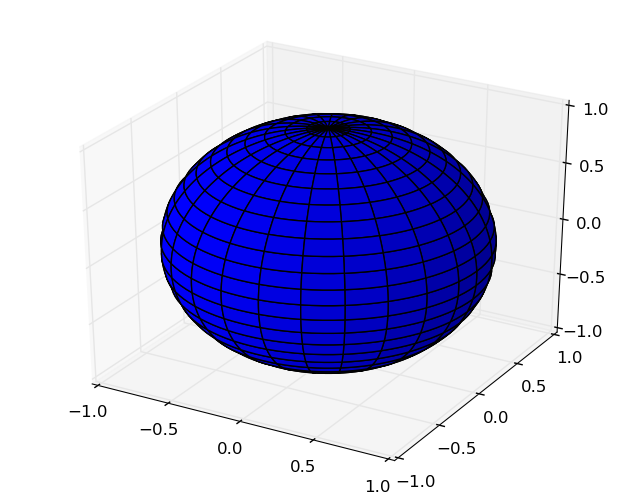

PyObject <mpl_toolkits.mplot3d.art3d.Poly3DCollection object at 0x7f4170692450>

  likely near /opt/julia_packages/.julia/v0.5/IJulia/src/kernel.jl:31
  likely near /opt/julia_packages/.julia/v0.5/IJulia/src/kernel.jl:31
  likely near /opt/julia_packages/.julia/v0.5/IJulia/src/kernel.jl:31
  likely near /opt/julia_packages/.julia/v0.5/IJulia/src/kernel.jl:31
  likely near /opt/julia_packages/.julia/v0.5/IJulia/src/kernel.jl:31
  likely near /opt/julia_packages/.julia/v0.5/IJulia/src/kernel.jl:31
  likely near /opt/julia_packages/.julia/v0.5/IJulia/src/kernel.jl:31
  likely near /opt/julia_packages/.julia/v0.5/IJulia/src/kernel.jl:31
  likely near /opt/julia_packages/.julia/v0.5/IJulia/src/kernel.jl:31
  likely near /opt/julia_packages/.julia/v0.5/IJulia/src/kernel.jl:31
  likely near /opt/julia_packages/.julia/v0.5/IJulia/src/kernel.jl:31
  likely near /opt/julia_packages/.julia/v0.5/IJulia/src/kernel.jl:31
  likely near /opt/julia_packages/.julia/v0.5/IJulia/src/kernel.jl:31
in show at /opt/julia_packages/.julia/v0.5/PyCall/src/PyCall.jl
  likely near /opt/julia_p

In [1]:
using PyPlot
n = 100
u = linspace(0,2*π,n);
v = linspace(0,π,n);

x = cos(u) * sin(v)';
y = sin(u) * sin(v)';
z = ones(n) * cos(v)';

# The rstride and cstride arguments default to 10
surf(x,y,z, rstride=4, cstride=4)

Because of this we see that if $\mathbf{q}$ is an eigenvector of $A$, then since $\nabla r(\mathbf{q})=\mathbf{0}$, and $r$ is smooth, we see that:

$$
r(\mathbf{x})-r(\mathbf{q}) = O\left(\|\mathbf{x}-\mathbf{q}\|^2\right),\quad \text{as } \mathbf{x}\to \mathbf{q}.
$$

Thus the Rayleigh quotient is a _quadratically accurate_ estimate of an eigenvalue!

In [2]:
A = [2 1 1; 
     1 3 1; 
     1 1 4]
(λ,X) = eig(A);
@show λ;

λ = [1.32487,2.46081,5.21432]


In [3]:
X

3×3 Array{Float64,2}:
  0.88765   -0.233192  -0.397113
 -0.427132  -0.739239  -0.520657
 -0.172148   0.631781  -0.755789

The max of  $r(\mathbf{v})$ is the third eigenvector of $A$ as computed above, and close to $(0.4,0.5,0.75)$.

In [4]:
x = X[:,3];  
v = [0.4;0.5;0.75];
evec_err = norm(-x-v)

0.02164672504409101

In [5]:
eval_est = v'*A*v/(v'*v)
eval_err = norm(eval_est-λ[3])

0.0009521341230360747

### Power Iteration

Now that we can turn an eigenvector estimate into an (even better, in the hermitian case) eigenvalue estimate, we turn to finding such eigenvectors. Clearly, if $A=XDX^{-1}$ and $k$ is a positive integer, then  $A^k=XD^kX^{-1}$. That is,  $A$ and $A^k$ share the same eigenvectors, but the eigenvalues of  $A^k$ are raised to the  $k$-th power. 

Note that if there is an eigenvalue  $\lambda_1$  such that  $|\lambda_1|>|\lambda_j|$ for all  $j>1$, the ratio  

$$\left|\frac{\lambda_j}{\lambda_1}\right|^k \to 0, \quad \text{as } k\to \infty,$$ 

and in that case $A^k \mathbf{v}$ is dominated by the eigenvector $\mathbf{q}_1$ that belongs with $\lambda_1$, for practically any vector $\mathbf{v}$. This leads us to the **power iteration**.

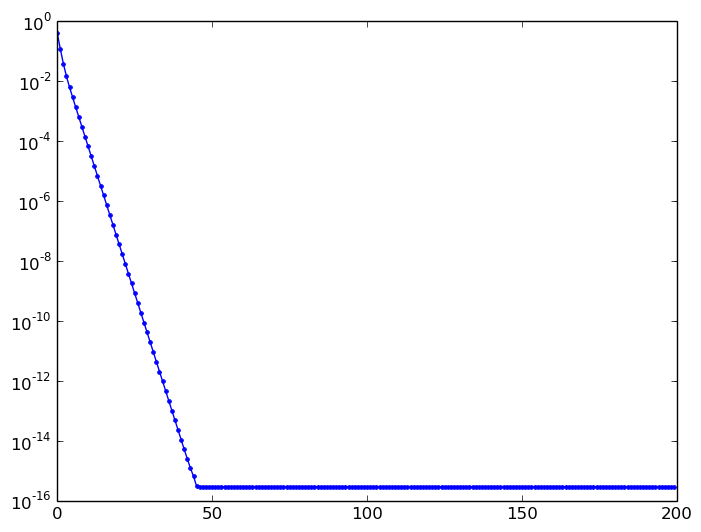

In [6]:
v = rand(3);
evec_err = [];
for k = 1:200
    v = v/norm(v);
    evec_err = [evec_err;min(norm(v-x),norm(v+x))];
    v = A*v;
end
using PyPlot
semilogy(evec_err,".-");

Since $A$ is symmetric, we should expect around 12 accurate digits in an eigenvalue estimate derived from a Rayleigh quotient with our final $\mathbf{v}$.

In [16]:
abs( v'*A*v/(v'*v) - λ[3] )

1×1 Array{Float64,2}:
 3.90799e-14

### Inverse Iteration

If $\lambda_J$ is an eigenvalue of $A$, then  $(\lambda_J-\mu)^{-1}$ is an eigenvalue of $(A-\mu I)^{-1}$, with the _same_ eigenvector. 

If $\mu$ is closer to $\lambda_J$ than to any other $\lambda_j$, a power iteration on $(A-\mu I)^{-1}$ should converge very quickly — because $(\lambda_J-\mu)^{-1}$ will be much larger than any other eigenvalue. 

This amounts to repeatedly solving a linear system with the matrix $(A-\mu I)$.

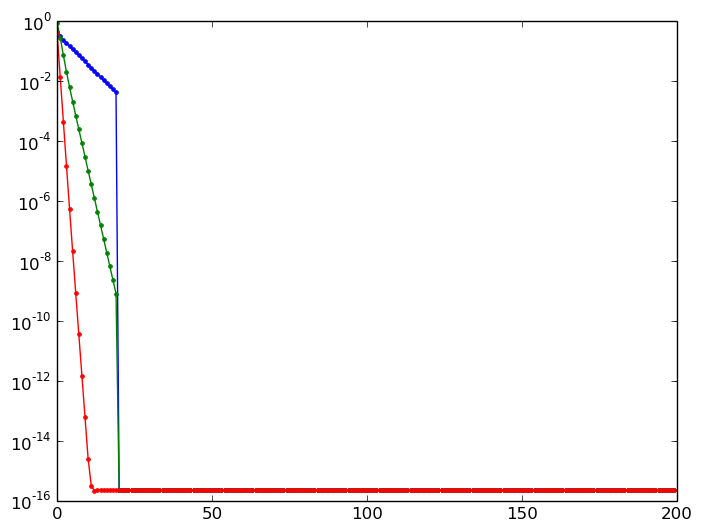

In [8]:
for μ = [4 4.5 5.1]
    LU = lufact(A-μ*eye(3));
    v = rand(3,1);
    for k = 1:20
        v = v/norm(v);
        evec_err[k] = min(norm(v-x),norm(v+x));
        v = LU\v;
    end
    semilogy(evec_err,".-")
end

> ** THEOREM. ** Suppose $\lambda_J$ is the closest eigenvalue to $\mu$ and $\lambda_K$ is the second closest, that is $|\mu - \lambda_J|<|\mu-\lambda_K|\leq |\mu-\lambda_j|$ for each $j\ne J$.  Furthermore, suppose $\mathbf{q}_J^\top \mathbf{v}^{(0)} \ne 0$.  Then the iterates of the above algorithm satisfy:
$$\|\mathbf{v}^{(k)} - (\pm \mathbf{q}_J)\| = O \left(\left|\frac{\mu-\lambda_J}{\mu-\lambda_K}\right|^k\right), \quad \|\lambda^{(k)} - \lambda_J | = O\left(\left|\frac{\mu-\lambda_J}{\mu-\lambda_K}\right|^{2k}\right)$$ as $k\to \infty$, where the $\pm$ sign has the same meaning as before.

### Rayleigh Quotient Iteration

The coup de grâce: a better shift means a better eigenvector estimate, which means a better eigenvalue estimate, which is an even better shift, etc. This feedback loop causes cubic convergence in the hermitian case, which is rare — and fast! It's so fast that we pretty well need extended precision to see it.

In [9]:
A = map(x->convert(BigFloat,x),A);
v = map(x->convert(BigFloat,x),ones(3));
μ = [];
for k = 1:5
    v = v/norm(v);
    μ = [μ; dot(v,A*v)]; 
    v = (A-μ[k]*eye(3))\v;    
end
println("error in eigenvalue estimates: ");
[@printf("%.60f\n",μ[i]-μ[end]) for i=1:5];

error in eigenvalue estimates: 
-0.214319743377535187415497700848580488907919637219499434331382
-0.001204989279174531677792782815793603662017997875237139249415
-0.000000000193503356367044172259691163055391791912161044219824
-0.000000000000000000000000000000862716756381603567636210700617
0.000000000000000000000000000000000000000000000000000000000000
